

# Richards' Equation, steady state

This is a simple verticle, pseudo-1D column of water with a water table below the surface.  It solves the pressure to steady-state.  For constant density and incompressible solid, this would be a linear pressure profile. (but we include a pressure-dependent density.)

Input parameters:

1. Mesh size defined using Generated Mesh - Box type.
- Low coordinate - (0,0,0), High coordinate - (1,1,10), number of cells - (1,1,100)
- Creates a pseudo 1D water column with 100 cells along the z-direction.

2. Solves the Richards equation

3. Boundary condition (Dirichlet type): Bottom surface - Pressure - 140000 Pa

4. Water Retention Parameters [WRM] - Van Genuchten Model : $alpha$ [$Pa^{-1}$] = 0.00015, m [-] = 0.8, residual saturation [-] = 0.

5. Water content is calculated by Richards water content. 

\begin{equation}
            \theta = n * s * \phi *  {cell volume}
\end{equation}

where n = molar density of liquid phase [mol $m^{-3}$], s = saturation of phase [-], $\phi$ = porosity [-].

6. The relative permeability method - upwind with Darcy flux - Relative permeability is defined on cells, but must be calculated on faces to multiply a flux.

7. Porosity ($\phi$) = 0.25, permeability (K) = 2.5e-12 $m^2$, temperature (T) = 275.15 K, P_0 = atmospheric pressure (Pa)

<font color='red'> Steps: Pressure (both water pressure and elevation pressure) is calculated in the vertical column (Based on bottom B.C), we get a linear profile -->  Using the VGc parameters, we can determine the variably saturated profile and by the Maulem model, we can determine the relative permeability --> Then saturation of liquid is calculated --> Saturation of gas. </font>

### Richards equation:

For transient state, the 3-D Richard's equation in variably saturated domain is:
\begin{equation}
    \frac{\partial \theta}{\partial t} - \triangledown \frac{k_r n_l}{\mu} K (\triangledown p + \rho g \hat{z}) = Q_w 
\end{equation}

where, $\theta$ = Extensive water content of the cell [mol], t = time variable [s], $\triangledown$ = Divergence operator, $k_r$ = relative permeability [-], $n_l$ = molar density of liquid phase [mol $m^{-3}$], $\mu$ = Absolute (Dynamic) viscosity of water (Pas), K = Absolute permeability [$m^{2}$], p = liquid pressure [Pa], $\rho$ = density of water, $\hat{z}$ = elevation [m], $Q_w$ = mass source of water [mol $s^{-1}$] 

For steady state, $\frac{\partial \theta}{\partial t}$ = 0 and no source or sink term, implies that $Q_w$ = 0.

Hence the above equation reduces as:
\begin{equation}
    \triangledown \frac{k_r n_l}{\mu} K (\triangledown p + \rho g \hat{z}) = 0
\end{equation}

### Van Genuchten Model:

Defined in the function - $wrm_{vangenuchten}$

The retention curve as given by [Schuh et al., 2017]: (Is this the same equation that the demo problem executes?)

If $P_c$ > 0,
\begin{equation}
     S_* (P_c) = S_r + (1 - S_r) [1 + (\alpha P_c)^n]^{-m}
\end{equation}

else 
\begin{equation}
    S_* (P_c) = 1
\end{equation}

Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}

where, $S_r$ (-) - Residual saturation, $P_c$ (Pa) - Capillary pressure, and $\alpha$ ($Pa^{-1}$), and m = 1 - 1/n - model parameters, $s_l$ = saturation of liquid

The exponent m controls the shape of the soil retention curve and can be related to the pore size distribution of the texture, where larger values corresponds to smaller pore size variability i.e. to well-sorted textures. 



<font color='blue'> Q - How is saturation of liquid calculated? - Is this the same equation used in the demo problem? </font>

$s_l = (1 - s_i) S_* (P_{cgl})$

where s_i = 0 (Since there is no ice phase), P_{cgl}  = liquid–gas capillary pressure

Therefore, the equation reduces to 

$s_l = S_* (P_{cgl})$


Extra:
$s_l = S_* [-\beta \rho_i h_0 \upsilon H (-\upsilon) + (S_*)^{-1} (s_l + s_i)]$
 - However this equation includes the ice phase! 
 


Author: Ethan Coon (Initial code) and Radhakrishna

In [1]:
%matplotlib inline

In [2]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data
import numpy as np
from matplotlib import pyplot as plt
import h5py
import pandas as pd

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
# load the ATS solution
directory = "./richards_steadystate.demo"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)


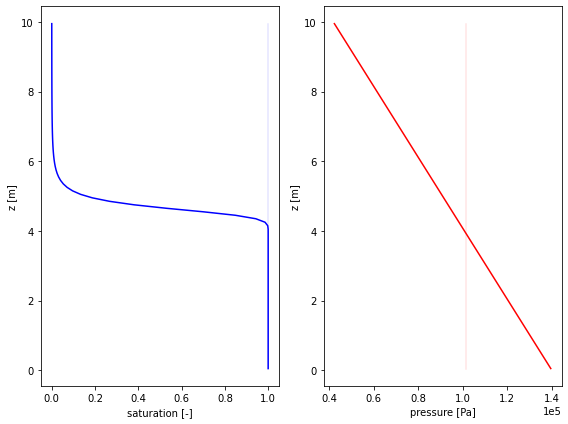

In [5]:
# plot the solution
fig = plt.figure(figsize=(8,6))
axs = fig.subplots(1,2)
plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[0], None, 'b')
plot_column_data.plot_subsurface(vis, ['pressure',], axs[1], None, 'r')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z [m]')
axs[1].set_xlabel('pressure [Pa]')
axs[1].set_ylabel('z [m]')
plt.tight_layout()
plt.show()

VGC parameters: alpha = 0.00015, m = 0.8, w_res = 0

* Q - What is the equation describing this linear behaviour? - 
* Hydraulic head = Pressure head + Elevation head
* As z increases, Pressure head decreases (since hydraulic head remains constant) - Since it is a variably saturated zone, doesnt the pressure head also decrease as matric potential decreases as z increases from bottom? - The solution of pressure is the absolute pressure = water pressure + atmospheric pressure

$P_{abs} = P_l + P_o$

Q - What is the relationship between the atmospheric pressure at the boundary surface and the water pressure within the system?

In [6]:
### Moles to kg for water
# molar_mass_water = 18.015 # g/mol
# Assume 50 moles - how much grams does it weigh?
#water_moles = 50
#water_mass = 18.015 * 50
#water_mass

In [7]:
# The file is always stored as /0 (at initial instance) or /1 (at time instance 1)

# Printing all the quantities at time instance = 0
print('Printing all the quantities at initial instance = 0 \n')
print('Values are assigned for each of the 100 cells \n')
print('U - User, D - Developer \n')

with h5py.File('richards_steadystate.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    cell_volume_all_0 = np.array(hdf.get('cell_volume.cell.0/0'))
    cell_volume_0 = np.unique(cell_volume_all_0.flatten())
    print('Cell volume = ', cell_volume_0[0],'m^3 (U)') # Why 0.1 multiple times?
    print('\n')
    
    mass_density_all_0 = np.array(hdf.get('mass_density_liquid.cell.0/0'))
    mass_density_0 = np.unique(mass_density_all_0.flatten())
    print('Mass density [rho_w] = ',mass_density_0, 'kg m^{-3} (D)') # Assigned by developer
    print('\n')
    
    molar_density_all_0 = np.array(hdf.get('molar_density_liquid.cell.0/0'))
    molar_density_0 = np.unique(molar_density_all_0.flatten())
    print('Molar density of water [n_l] = ',molar_density_0, 'mol m^{-3} (D)') # Assigned by developer
    print('\n')
    
    permeability_all_0 = np.array(hdf.get('permeability.cell.0/0'))
    permeability_0 = np.unique(permeability_all_0.flatten())
    print('Absolute permeability [K] = ',permeability_0, ' m^{2} (U)') # Assigned by user
    print('\n')
    
    porosity_all_0 = np.array(hdf.get('porosity.cell.0/0'))
    porosity_0 = np.unique(porosity_all_0.flatten())
    print('Porosity [phi] = ',porosity_0, ' [-] (U)') # Assigned by user
    print('\n')
    
    pressure_all_0 = np.array(hdf.get('pressure.cell.0/0'))
    pressure_0 = np.unique(pressure_all_0.flatten())
    print('Absolute pressure [p_abs] = ',pressure_0, ' [Pa] (U)') # Assigned by user
    print('\n')
    
    relative_permeability_all_0 = np.array(hdf.get('relative_permeability.cell.0/0'))
    relative_permeability_0 = np.unique(relative_permeability_all_0.flatten())
    print('Relative permeability (Calculated by upwind with Darcy flux) [kr] = ',relative_permeability_0, ' [-] (U)') # Assigned by user with a method
    print('\n')
    
    saturation_gas_all_0 = np.array(hdf.get('saturation_gas.cell.0/0'))
    saturation_gas_0 = np.unique(saturation_gas_all_0.flatten())
    print('Saturation of gas [s_g] = ',saturation_gas_0, ' [-] (D)') # Assigned by DEVELOPER
    print('\n')
    
    saturation_liquid_all_0 = np.array(hdf.get('saturation_liquid.cell.0/0'))
    saturation_liquid_0 = np.unique(saturation_liquid_all_0.flatten())
    print('Saturation of liquid [s_l] = ',saturation_liquid_0, ' [-] (D)- Fully saturated') # Assigned by DEVELOPER
    print('\n')
    
    temperature_all_0 = np.array(hdf.get('temperature.cell.0/0'))
    temperature_0 = np.unique(temperature_all_0.flatten())
    print('Temperature [T] (at boundary faces and cells?) = ',temperature_0, ' [K] (U)') # Assigned by user
    print('\n')
    
    viscosity_liquid_all_0 = np.array(hdf.get('viscosity_liquid.cell.0/0'))
    viscosity_liquid_0 = np.unique(viscosity_liquid_all_0.flatten())
    print('dynamic_viscosity_liquid [v] = ',viscosity_liquid_0, ' [Pas] (D)') # Assigned by user
    print('\n')
    
    water_content_all_0 = np.array(hdf.get('water_content.cell.0/0'))
    water_content_0 = np.unique(water_content_all_0.flatten())
    print('water_content [theta] = ',water_content_0[0], ' [mol] (U & D)') # Assigned by user through Richards water content
    ### Moles to kg for water
    molar_mass_water = 18.015 # g/mol
    water_mass = 18.015 * 50
    print('\n')
    print('water_content [theta] = ',water_content_0[0]*molar_mass_water/1000, ' [Kg] (U)') 
    print('\n')
    print('richards_water_content [theta = phi*s*n_l*cellvolume] = ',porosity_0*saturation_liquid_0*molar_density_0*cell_volume_0[0], ' [mol] (U & D)')
    water_mass
    print('\n')
    
    

Printing all the quantities at initial instance = 0 

Values are assigned for each of the 100 cells 

U - User, D - Developer 

List of datasets in this file: 
 
 ['capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


Cell volume =  0.09999999999999964 m^3 (U)


Mass density [rho_w] =  [999.96028211] kg m^{-3} (D)


Molar density of water [n_l] =  [55506.16876284] mol m^{-3} (D)


Absolute permeability [K] =  [2.5e-12]  m^{2} (U)


Porosity [phi] =  [0.25]  [-] (U)


Absolute pressure [p_abs] =  [101325.]  [Pa] (U)


Relative permeability (Calculated by upwind with Darcy flux) [kr] =  [3.32744356]  [-] (U)


Saturation of gas [s_g

* Express water content as a dimensionless number? Similar to saturation!

### Storing the parameters as dataframes

In [8]:
# The file is always stored as /0 (at initial instance) or /1 (at time instance 1)

# Printing all the quantities at time instance = 0
print('Storing all the quantities at initial instance = 1 \n')
print('Values are assigned for each of the 100 cells \n')
print('U - User, D - Developer \n')

with h5py.File('richards_steadystate.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    # Cell_volume
    cell_volume_all = np.array(hdf.get('cell_volume.cell.0/1'))
    cell_volume = cell_volume_all.flatten()
    
    # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
    # Can we simplify the code?
    z = np.arange(0.0,10.0,0.1)
    data_results = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

    mass_density_all = np.array(hdf.get('mass_density_liquid.cell.0/1'))
    mass_density = mass_density_all.flatten()
    data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density


    
    molar_density_all = np.array(hdf.get('molar_density_liquid.cell.0/1'))
    molar_density = molar_density_all.flatten()
    data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density

    
    permeability_all = np.array(hdf.get('permeability.cell.0/1'))
    permeability = permeability_all.flatten()
    data_results['Absolute permeability [K] (m^{2})'] = permeability

    
    
    porosity_all = np.array(hdf.get('porosity.cell.0/1'))
    porosity = porosity_all.flatten()
    data_results['Porosity [phi] (-)'] = porosity

    pressure_all = np.array(hdf.get('pressure.cell.0/1'))
    pressure = pressure_all.flatten()
    data_results['Abs pressure [p_abs] [Pa]'] = pressure 
    # Water pressure or total pressure (Atm + water)? - Probably both
    
    relative_permeability_all = np.array(hdf.get('relative_permeability.cell.0/1'))
    relative_permeability = relative_permeability_all.flatten()
    data_results['Relative permeability [kr] [-]'] = relative_permeability

    
    saturation_gas_all = np.array(hdf.get('saturation_gas.cell.0/1'))
    saturation_gas = saturation_gas_all.flatten()
    data_results['Saturation of gas [s_g] [-]'] = saturation_gas

    
    saturation_liquid_all = np.array(hdf.get('saturation_liquid.cell.0/1'))
    saturation_liquid = saturation_liquid_all.flatten()
    data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid

    
    temperature_all = np.array(hdf.get('temperature.cell.0/1'))
    temperature = temperature_all.flatten()
    data_results['Temperature [T] [K]'] = temperature

    
    viscosity_liquid_all = np.array(hdf.get('viscosity_liquid.cell.0/1'))
    viscosity_liquid = viscosity_liquid_all.flatten()
    data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid

    
    water_content_all = np.array(hdf.get('water_content.cell.0/1'))
    water_content = water_content_all.flatten()
    data_results['water_content [theta] mols'] = water_content

data_results
    

Storing all the quantities at initial instance = 1 

Values are assigned for each of the 100 cells 

U - User, D - Developer 

List of datasets in this file: 
 
 ['capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']




,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Abs pressure [p_abs] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],Temperature [T] [K],viscosity_liquid [v] Pas],water_content [theta] mols
0.0,0.1,999.979374,55507.228505,2.500000e-12,0.25,139509.677614,3.327507e+00,0.000000,1.000000,275.15,0.001668,1387.680713
0.1,0.1,999.978883,55507.201289,2.500000e-12,0.25,138529.033082,3.327505e+00,0.000000,1.000000,275.15,0.001668,1387.680032
0.2,0.1,999.978393,55507.174073,2.500000e-12,0.25,137548.389030,3.327504e+00,0.000000,1.000000,275.15,0.001668,1387.679352
0.3,0.1,999.977903,55507.146857,2.500000e-12,0.25,136567.745460,3.327502e+00,0.000000,1.000000,275.15,0.001668,1387.678671
0.4,0.1,999.977412,55507.119641,2.500000e-12,0.25,135587.102370,3.327501e+00,0.000000,1.000000,275.15,0.001668,1387.677991
...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.1,999.960282,55506.168763,2.500000e-12,0.25,46349.838336,2.153636e-11,0.999784,0.000216,275.15,0.001668,0.300083
9.6,0.1,999.960282,55506.168763,2.500000e-12,0.25,45369.212286,1.741937e-11,0.999799,0.000201,275.15,0.001668,0.279594
9.7,0.1,999.960282,55506.168763,2.500000e-12,0.25,44388.586235,1.414143e-11,0.999812,0.000188,275.15,0.001668,0.260824
9.8,0.1,999.960282,55506.168763,2.500000e-12,0.25,43407.960185,1.152126e-11,0.999824,0.000176,275.15,0.001668,0.243604


## Plotting the parameters

Is pressure and density related?

Given by the equation -

$P_l = \rho_w g h$

In [9]:
data_results['mass_density [rho_l] [kg m^{-3}]'].describe()

count    100.000000
mean     999.964095
std        0.005913
min      999.960282
25%      999.960282
50%      999.960282
75%      999.967239
max      999.979374
Name: mass_density [rho_l] [kg m^{-3}], dtype: float64

### Plotting the pressure:

Assume $p_0$ - atmospheric pressure, $p_l$ - water pressure, $p_z$ = elevation pressure, $p_h$ = hydraulic pressure, $p_{abs}$ = Absolute pressure 

$p_{abs}$ - Piezometers measure absolute pressure

$p_{abs} = p_{0} + p_{l}$

$p_h = p_l + p_z$ 

The elevation where -ve water pressure develops, is the elevation where the saturation starts to drops from 1.

Here, the resultant pressure from the model is the absolute pressure (and not the water pressure! - right?)

In [10]:
rho_avg = np.mean(mass_density) # kg m^{-3} - Provided by the developer 
g = 9.8006 # ms^{-2} - Provided by the user, g = (0,0,-9.8006m ms^{-2})
p_0 = 101325 # Pa

# Calculating the water pressure = p_abs -p_0
data_results['Water pressure [p_l] [Pa]'] = data_results['Abs pressure [p_abs] [Pa]'] - p_0

data_results['Pressure head [m]'] = data_results['Water pressure [p_l] [Pa]']/(rho_avg*g)

data_results['Elevation head [m]'] = data_results.index

data_results['Hydraulic head [m]'] = data_results['Pressure head [m]'] + data_results['Elevation head [m]']

data_results['Atmospheric pressure head [m]'] = 101325/(rho_avg*g)

data_results

,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Abs pressure [p_abs] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],Temperature [T] [K],viscosity_liquid [v] Pas],water_content [theta] mols,Water pressure [p_l] [Pa],Pressure head [m],Elevation head [m],Hydraulic head [m],Atmospheric pressure head [m]
0.0,0.1,999.979374,55507.228505,2.500000e-12,0.25,139509.677614,3.327507e+00,0.000000,1.000000,275.15,0.001668,1387.680713,38184.677614,3.896297,0.0,3.896297,10.339024
0.1,0.1,999.978883,55507.201289,2.500000e-12,0.25,138529.033082,3.327505e+00,0.000000,1.000000,275.15,0.001668,1387.680032,37204.033082,3.796234,0.1,3.896234,10.339024
0.2,0.1,999.978393,55507.174073,2.500000e-12,0.25,137548.389030,3.327504e+00,0.000000,1.000000,275.15,0.001668,1387.679352,36223.389030,3.696171,0.2,3.896171,10.339024
0.3,0.1,999.977903,55507.146857,2.500000e-12,0.25,136567.745460,3.327502e+00,0.000000,1.000000,275.15,0.001668,1387.678671,35242.745460,3.596107,0.3,3.896107,10.339024
0.4,0.1,999.977412,55507.119641,2.500000e-12,0.25,135587.102370,3.327501e+00,0.000000,1.000000,275.15,0.001668,1387.677991,34262.102370,3.496044,0.4,3.896044,10.339024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.1,999.960282,55506.168763,2.500000e-12,0.25,46349.838336,2.153636e-11,0.999784,0.000216,275.15,0.001668,0.300083,-54975.161664,-5.609568,9.5,3.890432,10.339024
9.6,0.1,999.960282,55506.168763,2.500000e-12,0.25,45369.212286,1.741937e-11,0.999799,0.000201,275.15,0.001668,0.279594,-55955.787714,-5.709630,9.6,3.890370,10.339024
9.7,0.1,999.960282,55506.168763,2.500000e-12,0.25,44388.586235,1.414143e-11,0.999812,0.000188,275.15,0.001668,0.260824,-56936.413765,-5.809691,9.7,3.890309,10.339024
9.8,0.1,999.960282,55506.168763,2.500000e-12,0.25,43407.960185,1.152126e-11,0.999824,0.000176,275.15,0.001668,0.243604,-57917.039815,-5.909752,9.8,3.890248,10.339024


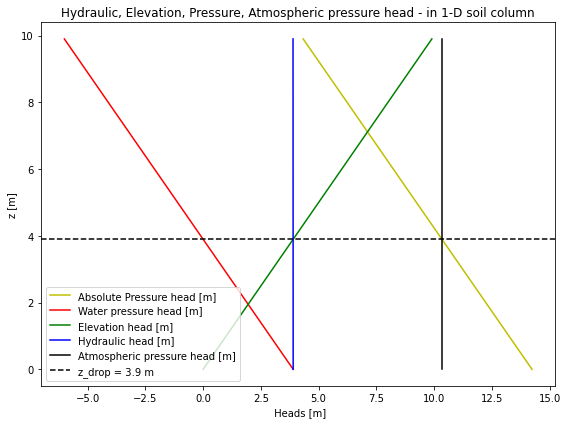

In [11]:
# To find the elevation where -ve pressure head begins
z_drop = data_results[data_results['Pressure head [m]'].le(0)].index[0]

 
fig = plt.figure(figsize=(8,6))

plt.title('Hydraulic, Elevation, Pressure, Atmospheric pressure head - in 1-D soil column')
plt.plot(data_results['Abs pressure [p_abs] [Pa]']/(rho_avg*g), z, 'y', label='Absolute Pressure head [m]')
plt.plot(data_results['Pressure head [m]'], z, 'r', label='Water pressure head [m]')
plt.plot(data_results['Elevation head [m]'], z, 'g', label='Elevation head [m]')
plt.plot(data_results['Hydraulic head [m]'], z, 'b', label='Hydraulic head [m]')
plt.plot(data_results['Atmospheric pressure head [m]'], z, 'k', label='Atmospheric pressure head [m]')
plt.axhline(y=z_drop,color='k',linestyle='--',label='z_drop = 3.9 m')
plt.ylabel('z [m]')
plt.xlabel(' Heads [m]')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Density dependent pressure or pressure dependent density?
# fig = plt.figure(figsize=(8,6))

#plt.title('Pressure dependent density')
#plt.plot(data_results['Pressure head [m]'], data_results['mass_density [rho_l] [kg m^{-3}]'], 'r')

#plt.xlabel('Pressure head [m]')
#plt.ylabel(' Mass density [kg m^{-3}]')
#plt.tight_layout()
#plt.show()

### Plotting relative permeability

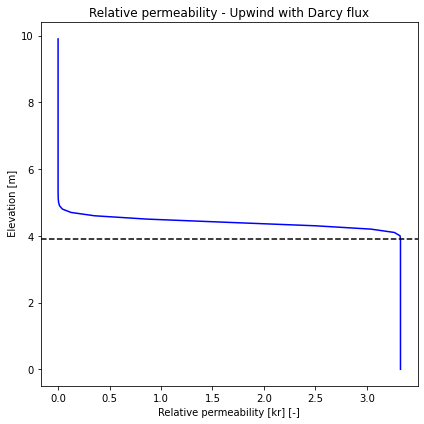

In [18]:
fig = plt.figure(figsize=(6,6))

plt.title('Relative permeability - Upwind with Darcy flux')
plt.plot(data_results['Relative permeability [kr] [-]'],z, 'b')

plt.xlabel('Relative permeability [kr] [-]')
plt.ylabel(' Elevation [m]')
plt.axhline(y=z_drop,color='k',linestyle='--',label='z_drop = 3.9 m')
plt.tight_layout()
#plt.show()

- How is the relative permeability calculated? - Van Genuchten Maulem model

### Van-Genuchten Maulem  Model

#### Defined in the function - $wrm_{vangenuchten}$

The retention curve as given by [Schuh et al., 2017] :

If $P_c$ > 0, $S_*$ ($P_c$) = $S_r$ + (1 - $S_r$) $[1 + (\alpha P_c)^n]^{-m}$

else $S_*$ ($P_c$) = 1


Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}

where, $S_*$ - Retention curve for unfrozen liquid-gas phase, $S_r$ (-) - Residual saturation, $P_c$ (Pa) - Capillary pressure, and $\alpha$ ($Pa^{-1}$), and m = 1 - 1/n - model parameters, $s_l$ = saturation of liquid

The saturation of liquid and gas is equal to 1, i.e,

$s_l + s_g = 1$






The exponent m controls the shape of the soil retention curve and can be related to the pore size distribution of the texture, where larger values corresponds to smaller pore size variability i.e. to well-sorted textures.

Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}

$s_l = S_* [-\beta \rho_i h_0 \upsilon H (-\upsilon) + (S_*)^{-1} (s_l + s_i)]$
 - However this equation includes the ice phase! - What is the equation used by the demo problem?

Q - How is saturation of liquid calculated? - Is this the same equation used in the demo problem?

#### Calculating the saturation based on VanGenuchten's model


In [14]:
# data_results_VGC = pd.DataFrame(data=data_results['Water pressure [p] [Pa]'].values,index=

In [15]:
#data_results_VGC['ad'] = data_results['Water pressure [p] [Pa]']*10

In [16]:
##### Parameters that we assigned:
#alpha = 0.00015
#m = 0.8
#Sr = 0
#n = 1/(1-m)
#data_results_VGC = data_results.copy()
#data_results_VGC['S_*'] = Sr + (1 - Sr) * pow(1 + pow(alpha*data_results_VGC['Water pressure [p] [Pa]'],n),(-m))
#data_results_VGC['S_*(Pc)'] =  pow(1 + pow(alpha * data_results['Water pressure [p] [Pa]'],n),(-m))


How do you find out saturation of the liquid?

### Plotting saturation :

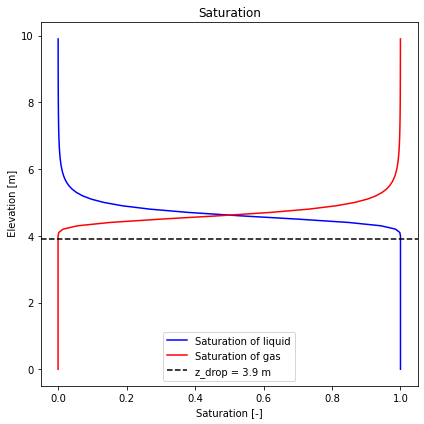

In [19]:
fig = plt.figure(figsize=(6,6))

plt.title('Saturation')
plt.plot(data_results['Saturation of liquid [s_l] [-]'], z, 'b', label='Saturation of liquid')
plt.plot(data_results['Saturation of gas [s_g] [-]'], z, 'r', label='Saturation of gas')

plt.xlabel('Saturation [-]')
plt.ylabel(' Elevation [m]')
plt.axhline(y=z_drop,color='k',linestyle='--',label='z_drop = 3.9 m')
plt.tight_layout()
plt.legend()
#plt.show()

In [18]:
### Plotting Richards water content

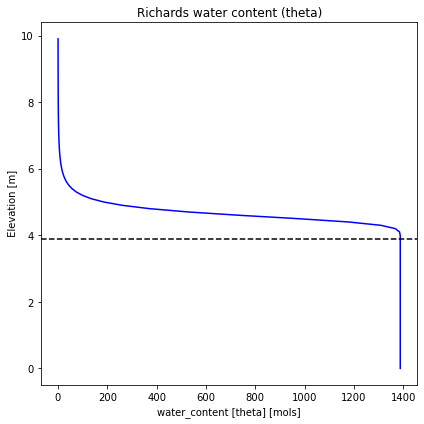

In [20]:
fig = plt.figure(figsize=(6,6))

plt.title('Richards water content (theta)')
plt.plot(data_results['water_content [theta] mols'],z, 'b')

plt.xlabel('water_content [theta] [mols]')
plt.ylabel(' Elevation [m]')
plt.axhline(y=z_drop,color='k',linestyle='--',label='z_drop = 3.9 m')
plt.tight_layout()
#plt.show()

### Plotting

In [270]:
data_results.columns

Index(['cell_volume', 'mass_density [rho_l] [kg m^{-3}]',
       'molar_density [n_l] [mol m^{-3}]', 'Absolute permeability [K] (m^{2})',
       'Porosity [phi] (-)', 'Water pressure [p] [Pa]',
       'Relative permeability [kr] [-]', 'Saturation of gas [s_g] [-]',
       'Saturation of liquid [s_l] [-]', 'Temperature [T] [K]',
       'viscosity_liquid [v] Pas]', 'water_content [theta] mols',
       'Pressure head [m]', 'Elevation head [m]', 'Hydraulic head [m]',
       'Atmospheric pressure head [m]'],
      dtype='object')

### Plotting the Van Genuchten (VGC) Model:

In [20]:
import wrm_vangenuchten

In [ ]:
import numpy as np

class VanGenuchten(object):
    def __init__( self, m=0., alpha=0., sr=0.0, smoothing_interval=0. ):
        self._m = m
        self._alpha = alpha
        self._sr = sr
        self._n = 1.0/(1.0-m)
        self._pc0 = smoothing_interval

        if self._pc0 > 0.:
            k0 = self.k_relative(self._pc0) - 1.
            k0p = self.d_k_relative(self._pc0)
            self._a = (3 * k0 - k0p * self._pc0) / (self._pc0**2)
            self._b = (k0p * self._pc0 - 2 * k0) / (self._pc0**3)

    def capillaryPressure( self, s ):
        se = (s - self._sr) / (1.0 - self._sr);
        if (se < 1.e-8):
            return pow(se, -1.0/(self._m * self._n)) / self._alpha
        else:
            return (pow(pow(se, -1.0/self._m) - 1.0, 1/self._n)) / self._alpha

    def d_capillaryPressure( self, s ):
        se = (s - self._sr) / (1.0 - self._sr);
        if se < 1.e-8:
            return -1 / (self._m * self._n * self._alpha) \
              * pow(se, -1/(self._m * self._n) - 1.) / (1. - self._sr)
        else:
            return -1 / (self._m * self._n * self._alpha) \
              * pow(pow(se,-1./self._m) - 1., 1./self._n - 1.) \
              * pow(se, -1./self._m - 1.) / (1. - self._sr)

    def saturation( self, pc ):
        if pc <= 0.0:
            return 1.0
        else:
            se = pow(1.0 + pow(self._alpha*pc, self._n), -self._m)
            return  se * (1.0 - self._sr) + self._sr

    def d_saturation( self, pc ):
        if pc <= 0.:
            return 0.
        else:
            dse_dpc = -self._m*self._n * pow(1.0 + pow(self._alpha*pc, self._n), -self._m-1.0) * pow(self._alpha*pc, self._n-1) * self._alpha
            return  (1.0 - self._sr) * dse_dpc

    def k_relative( self, pc ):
        if pc >= self._pc0:
            se = pow(1.0 + pow(self._alpha*pc,self._n),-self._m)
            return np.sqrt(se) * pow( 1.0 - pow( 1.0 - pow(se,1.0/self._m),self._m), 2);
        elif pc <= 0.:
            return 1.
        else:
            return 1. + self._a * (pc**2) + self._b * (pc**3)

    def d_k_relative( self, pc ):
        if pc >= self._pc0:
            se = pow(1.0 + pow(self._alpha*pc,self._n),-self._m)
            dsdp = self.d_saturation(pc)

            x = pow(se,1./self._m)
            y = pow(1. - x, self._m)
            dkdse = (1.0 - y) * ( (1. - y) / 2. + 2 * x * y / (1.-x)) / np.sqrt(se)
            return dkdse * dsdp / (1 - self._sr)
        elif pc <= 0:
            return 0.
        else:
            return 2 * pc * self._a + 3 * self._b * (pc**2)

In [45]:
alpha = 0.00015
m = 0.8
n = 1/(1-m)
sr = 0

def capillaryPressure(s):
        se = (s - sr) / (1.0 - sr);
        if (se < 1.e-8):
            return pow(se, -1.0/(m * n)) / alpha
        else:
            return (pow(pow(se, -1.0/m) - 1.0, 1/n)) / alpha


In [49]:
### Create a seperate dataframe and input all the values to see the results!

In [48]:
# Calling the object to determine the capillary pressure
s = np.array(data_results['Saturation of liquid [s_l] [-]'])

se = capillaryPressure(s)
se 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [25]:
### Defining an object - to extract the Van Genuchten parameters -
alpha = 0.00015
m = 0.8
n = 1/(1-m)
sr = 0


VGc_rk = VanGenuchten(alpha, n, sr)

In [47]:
# Calling the object to determine the capillary pressure
s = np.array(data_results['Saturation of liquid [s_l] [-]'])
VGc_rk.capillaryPressure(s)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
import plot_wrm

In [22]:
from matplotlib import pyplot as plt
import numpy as np


class Spline(object):
    """Forms a cublic spline on an interval given values and derivatives at the endpoints of that interval."""
    def __init__(self, x1, y1, dy1, x2, y2, dy2):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        self.dy1 = dy1
        self.dy2 = dy2

    def T(self, x):
        return (x - self.x1) / (self.x2 - self.x1)

    def Value(self, x):
        t = self.T(x)
        return (1-t)**2 * ((1+2*t) * self.y1 + t * (self.x2 - self.x1) * self.dy1) \
          + t**2 * ((3-2*t) * self.y2 + (t-1) * (self.x2 - self.x1) * self.dy2)
        
    def Derivative(self, x):
        t = self.T(x)
        dtdx = 1./(self.x2 - self.x1)
        dydt = (6*t**2 - 6*t)* self.y1 \
          + (3*t**2 - 4*t + 1) * (self.x2 - self.x1) * self.dy1 \
          + (-6*t**2 + 6*t) * self.y2 \
          + (3*t**2 - 2*t) * (self.x2 - self.x1) * self.dy2
        return dydt * dtdx


class VanGenuchten(object):
    def __init__( self, alpha, n, sr, l=0.5, smoothing_interval_sat=0.0, smoothing_interval_p=0.0 ):
        self._alpha = alpha
        self._n = n
        self._sr = sr
        self._l = l
        self._m = 1 - 1.0/n 

        # smoothing for sat
        self._s0 = 1.0 - smoothing_interval_sat
        if self._s0 < 1.:
            self._spline = Spline(self._s0, self.k_relative(self._s0), self.d_k_relative(self._s0),
                                         1.0, 1.0, 0.)
            
        # smoothing for pc
        self._pc0 = smoothing_interval_p
        if self._pc0 > 0.:
            self._spline_sat = Spline(0., 1., 0., self._pc0, self.saturation(self._pc0), self.d_saturation(self._pc0))

    def capillaryPressure( self, s ):
        if s <= self._sr:
            return np.inf
        if s >= 1.:
            return 0.
        se = (s - self._sr) / (1.0 - self._sr)
        if (se < 1.e-8):
            return pow(se, -1.0/(self._m * self._n)) / self._alpha
        else:
            return (pow(pow(se, -1.0/self._m) - 1.0, 1/self._n)) / self._alpha

    def saturation( self, pc ):
        if pc <= 0.0:
            return 1.0
        elif pc < self._pc0:
            return self._spline_sat.Value(pc)
        else:
            se = pow(1.0 + pow(self._alpha*pc, self._n), -self._m)
            return  se * (1.0 - self._sr) + self._sr

    def k_relative( self, s ):
        if s >= 1.:
            return 1.
        elif s <= self._sr:
            return 0.
        elif s <= self._s0:
            se = (s - self._sr) / (1.0-self._sr)
            return (se**self._l) * pow( 1.0 - pow( 1.0 - pow(se,1.0/self._m),self._m), 2)
        else:
            return self._spline.Value(s)

    def d_k_relative( self, s ):
        if s >= 1.:
            return 0
        elif s <= self._sr:
            return 0.
        elif s <= self._s0 + 1.e-6:
            se = (s - self._sr)/(1-self._sr);
            x = pow(se, 1.0 / self._m);

            if (abs(1.0 - x) < 1.e-10):
                return 0.0;
            y = pow(1.0 - x, self._m);

            dkdse = (1.0 - y) * (self._l * (1.0 - y) + 2 * x * y / (1.0 - x)) * pow(se, self._l - 1.0);
            return dkdse / (1 - self._sr);
        else:
            return self._spline.Derivative(s)

    def label( self ):
        return "VG: a=%1.2e [1/Pa], n=%1.2g, sr=%1.2g, smooth=%g"%(self._alpha, self._n, self._sr, 1-self._s0)

    def short_label( self ):
        return "VG: a=%1.2e [1/Pa], n=%1.2g, sr=%1.2g"%(self._alpha, self._n, self._sr)
        
    
    def plot(self, ax=None, color='b', format='-', label=None, y_units='Pa'):
        pc = np.linspace(0,7, 1000)
        pc = 10**pc

        if label is None:
            label = self.short_label()

        if ax is None:
            fig,ax = plt.subplots(1,1,squeeze=True)

        s = np.array([self.saturation(apc) for apc in pc])
            
        if y_units == 'hPa':
            pc = pc / 100.
        elif y_units == 'm':
            pc = pc / 1000 / 9.81
        elif y_units == 'cm':
            pc = pc / 1000 / 9.81 * 100
        elif y_units == 'Pa':
            pass
        else:
            raise ValueError("Invalid units for yaxis, must be one of [Pa, m, cm, hPa]")
    
        ax.semilogy(s, pc, color=color, label=label)
        ax.set_xlabel("saturation [-]")
        ax.set_ylabel("capillary pressure [{}]".format(y_units))
        return ax

    def plot_kr(self, ax=None, color='b', format='-', label=None):
        if ax is None: 
            fig,ax = plt.subplots(1,1,squeeze=True)

        if label is None:
            label = self.short_label()

        pc = np.linspace(0,7, 1000)
        pc = 10**pc

        sat = np.array([self.saturation(apc) for apc in pc])
        kr = np.array([self.k_relative(s) for s in sat])
        ax.plot(sat, kr, color=color, label=label)

       
if __name__ == "__main__":
    import sys
    import argparse
    import shlex
    import colors

    parser = argparse.ArgumentParser('plot WRM curves')

    def option_to_wrm(s):
        print("got: {}".format(s))
        try:
            s = shlex.split(s)
            print("s = {}".format(s))
            assert(3 <= len(s) <= 5)

            alpha, n, sr = map(float, s[0:3])

            if len(s) > 3:
                label = s[3]
            else:
                label = None

            if len(s) > 4:
                smooth_int_sat = float(s[4])
            else:
                smooth_int_sat = 0.
                
            print("WRM:")
            print(f"  alpha = {alpha}")
            print(f"  n = {n}")
            print(f"  sr = {sr}")
            print(f"  smoothing_interval_sat = {smooth_int_sat}")
            print(f"  label = {label}")
            
        except:
            raise argparse.ArgumentTypeError("WRM must be van Genucten parameters (alpha, n, sr, label, smoothing_interval_sat)")
        else:
            return label, VanGenuchten(alpha=alpha, n=n, sr=sr, smoothing_interval_sat=smooth_int_sat)
            
    parser.add_argument('--wrm', type=option_to_wrm, action='append', help='WRM parameters, "alpha n sr [label [smoothing_interval_sat]]"')
    parser.add_argument('--y-units', type=str, choices=['Pa','m','hPa','cm'], default='Pa', help='units of the y-axis, in log space')
    parser.add_argument('--kr', action='store_true', help='Plot relative permeability curve')

    args = parser.parse_args()
    color_list = colors.enumerated_colors(len(args.wrm))

    fig = plt.figure()
    ax = fig.add_subplot(111)

    if args.kr:
        for (label,wrm), color in zip(args.wrm, color_list):
            wrm.plot_kr(ax, color, label=label)
    else:
        for (label,wrm), color in zip(args.wrm, color_list):
            wrm.plot(ax, color, y_units=args.y_units, label=label)
    ax.legend()
    plt.show()
    sys.exit(0)
    

usage: plot WRM curves [-h] [--wrm WRM] [--y-units {Pa,m,hPa,cm}] [--kr]
plot WRM curves: error: unrecognized arguments: -f /home/rk/.local/share/jupyter/runtime/kernel-c9f10462-3e3f-4006-b5e6-8c6394bb6c68.json


SystemExit: 2